In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Importing Data</h2>

In [2]:
df=pd.read_csv('data.csv', encoding='unicode_escape')

C:\Users\admin\AppData\Local\Temp\ipykernel_10224\3231514487.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data.csv', encoding='unicode_escape')


<h1>Data Understanding</h1>

In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.shape

(435742, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [6]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [7]:
#Checking no of missing values in the dataset
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

<h1>Data Visualization</h1>

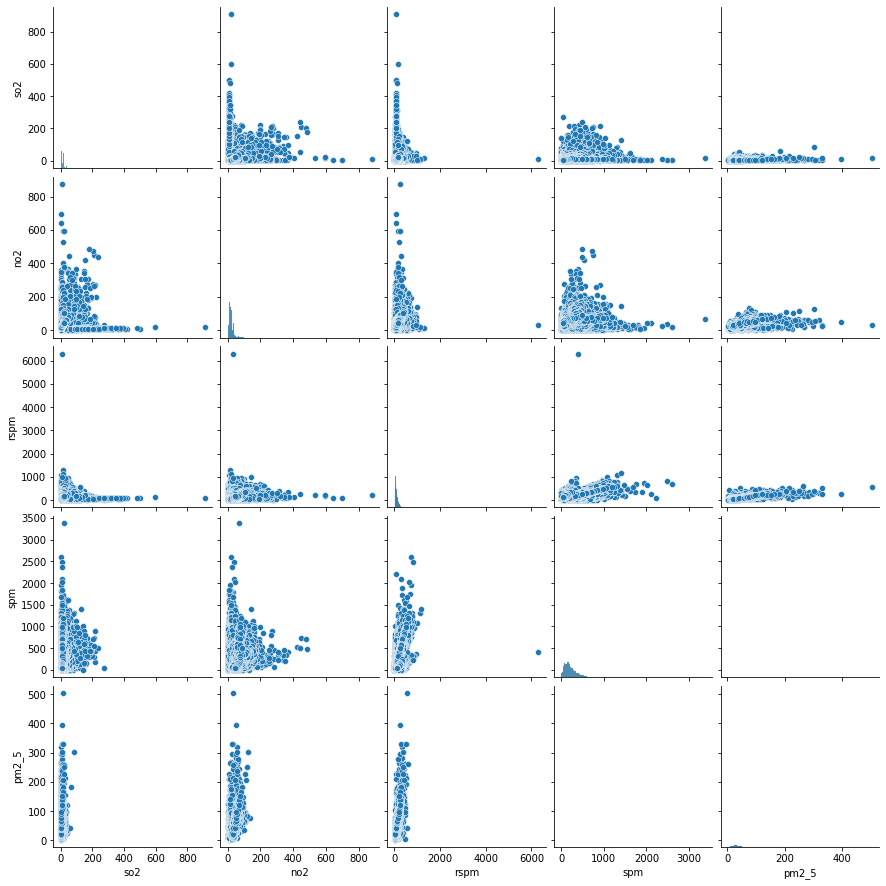

In [8]:
sns.pairplot(data=df)

In [10]:
#counting values in state
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

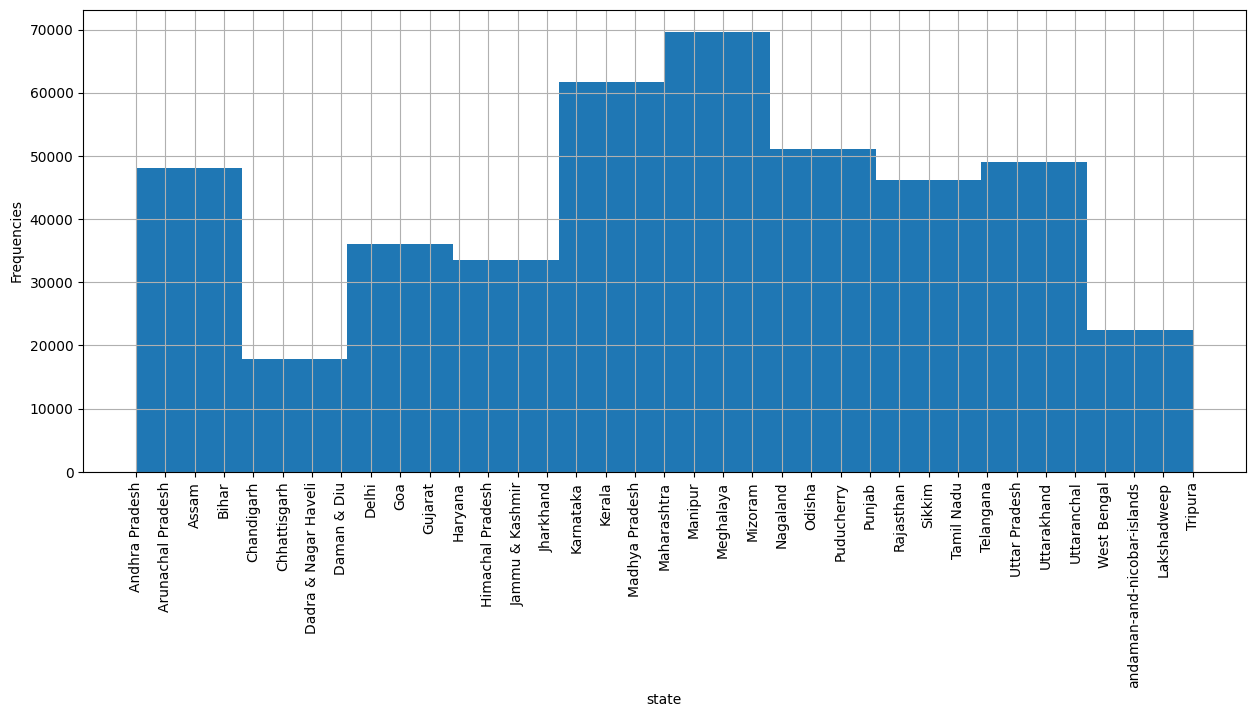

In [9]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

In [11]:
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

[]

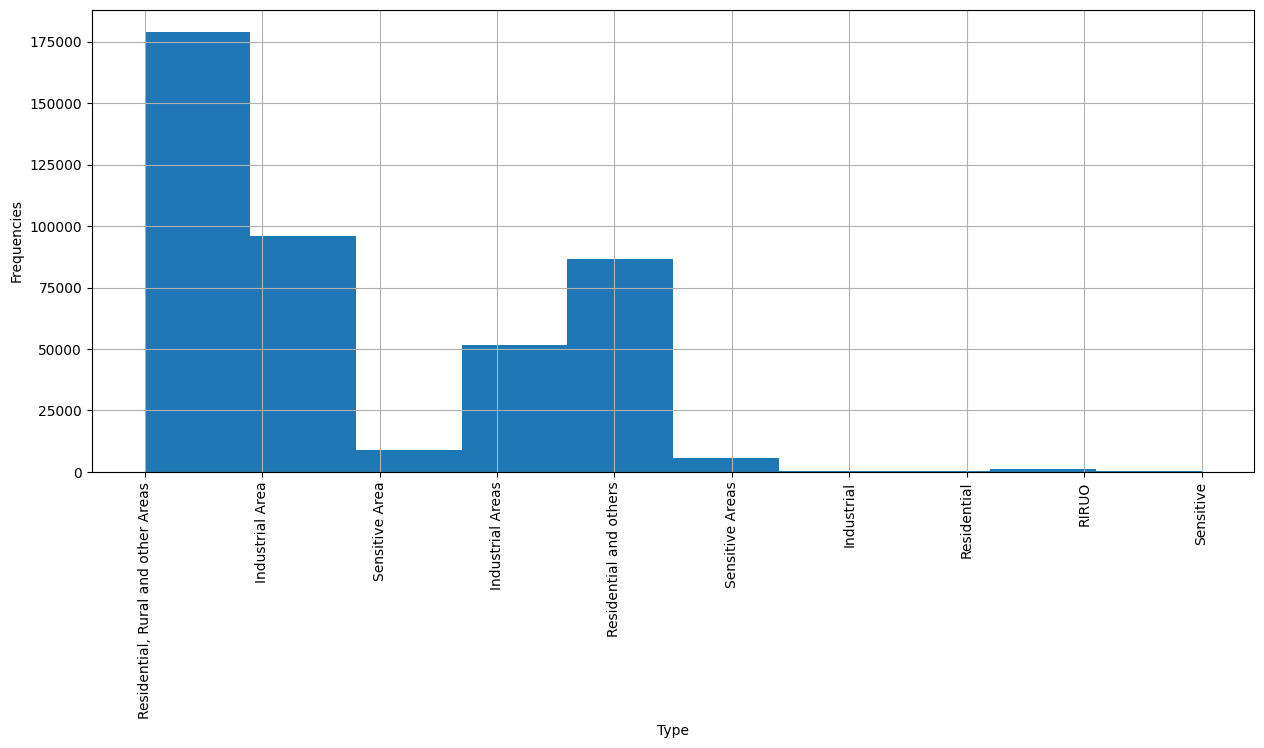

In [12]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

<h3>Which state has high so2?</h3>

<AxesSubplot:xlabel='state', ylabel='so2'>

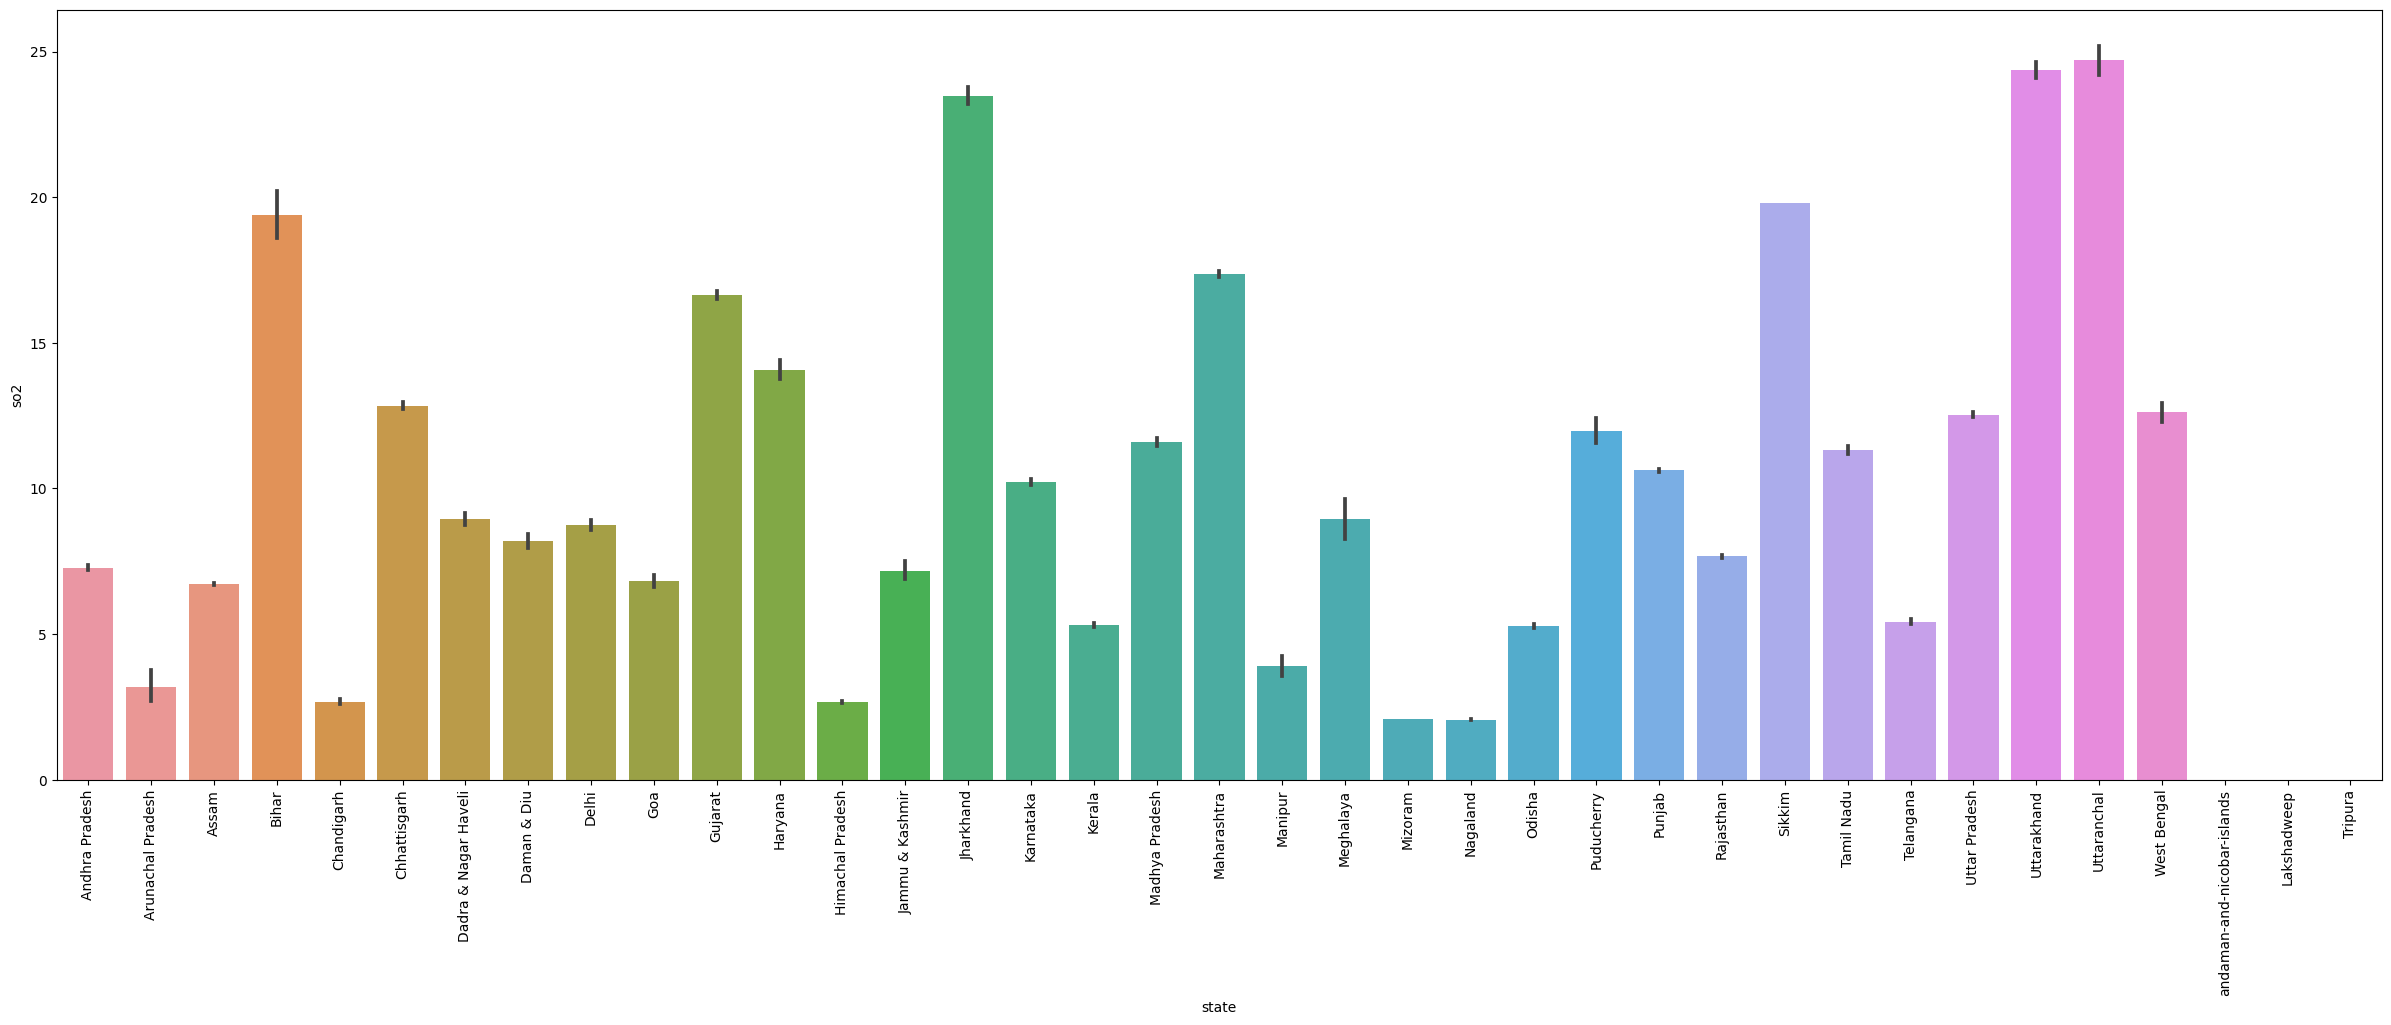

In [13]:
#the name of the state having higher so2 levels in the air 
#which is Uttaranchal followed by Uttarakhand
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df)

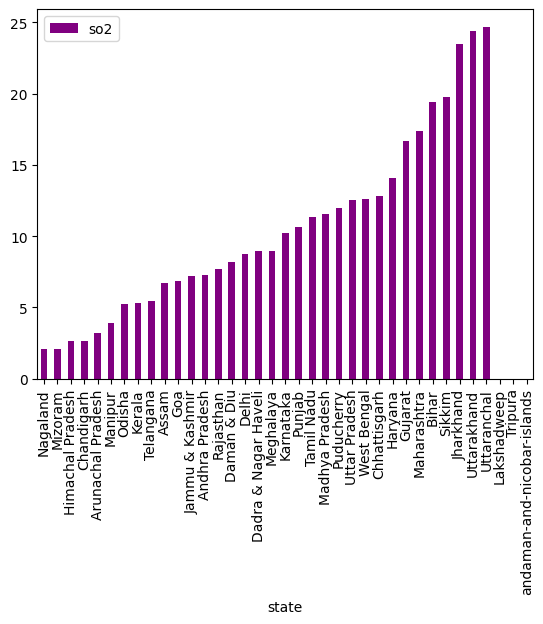

In [14]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

<h3>Which state has high no2?</h3>

<AxesSubplot:xlabel='state', ylabel='no2'>

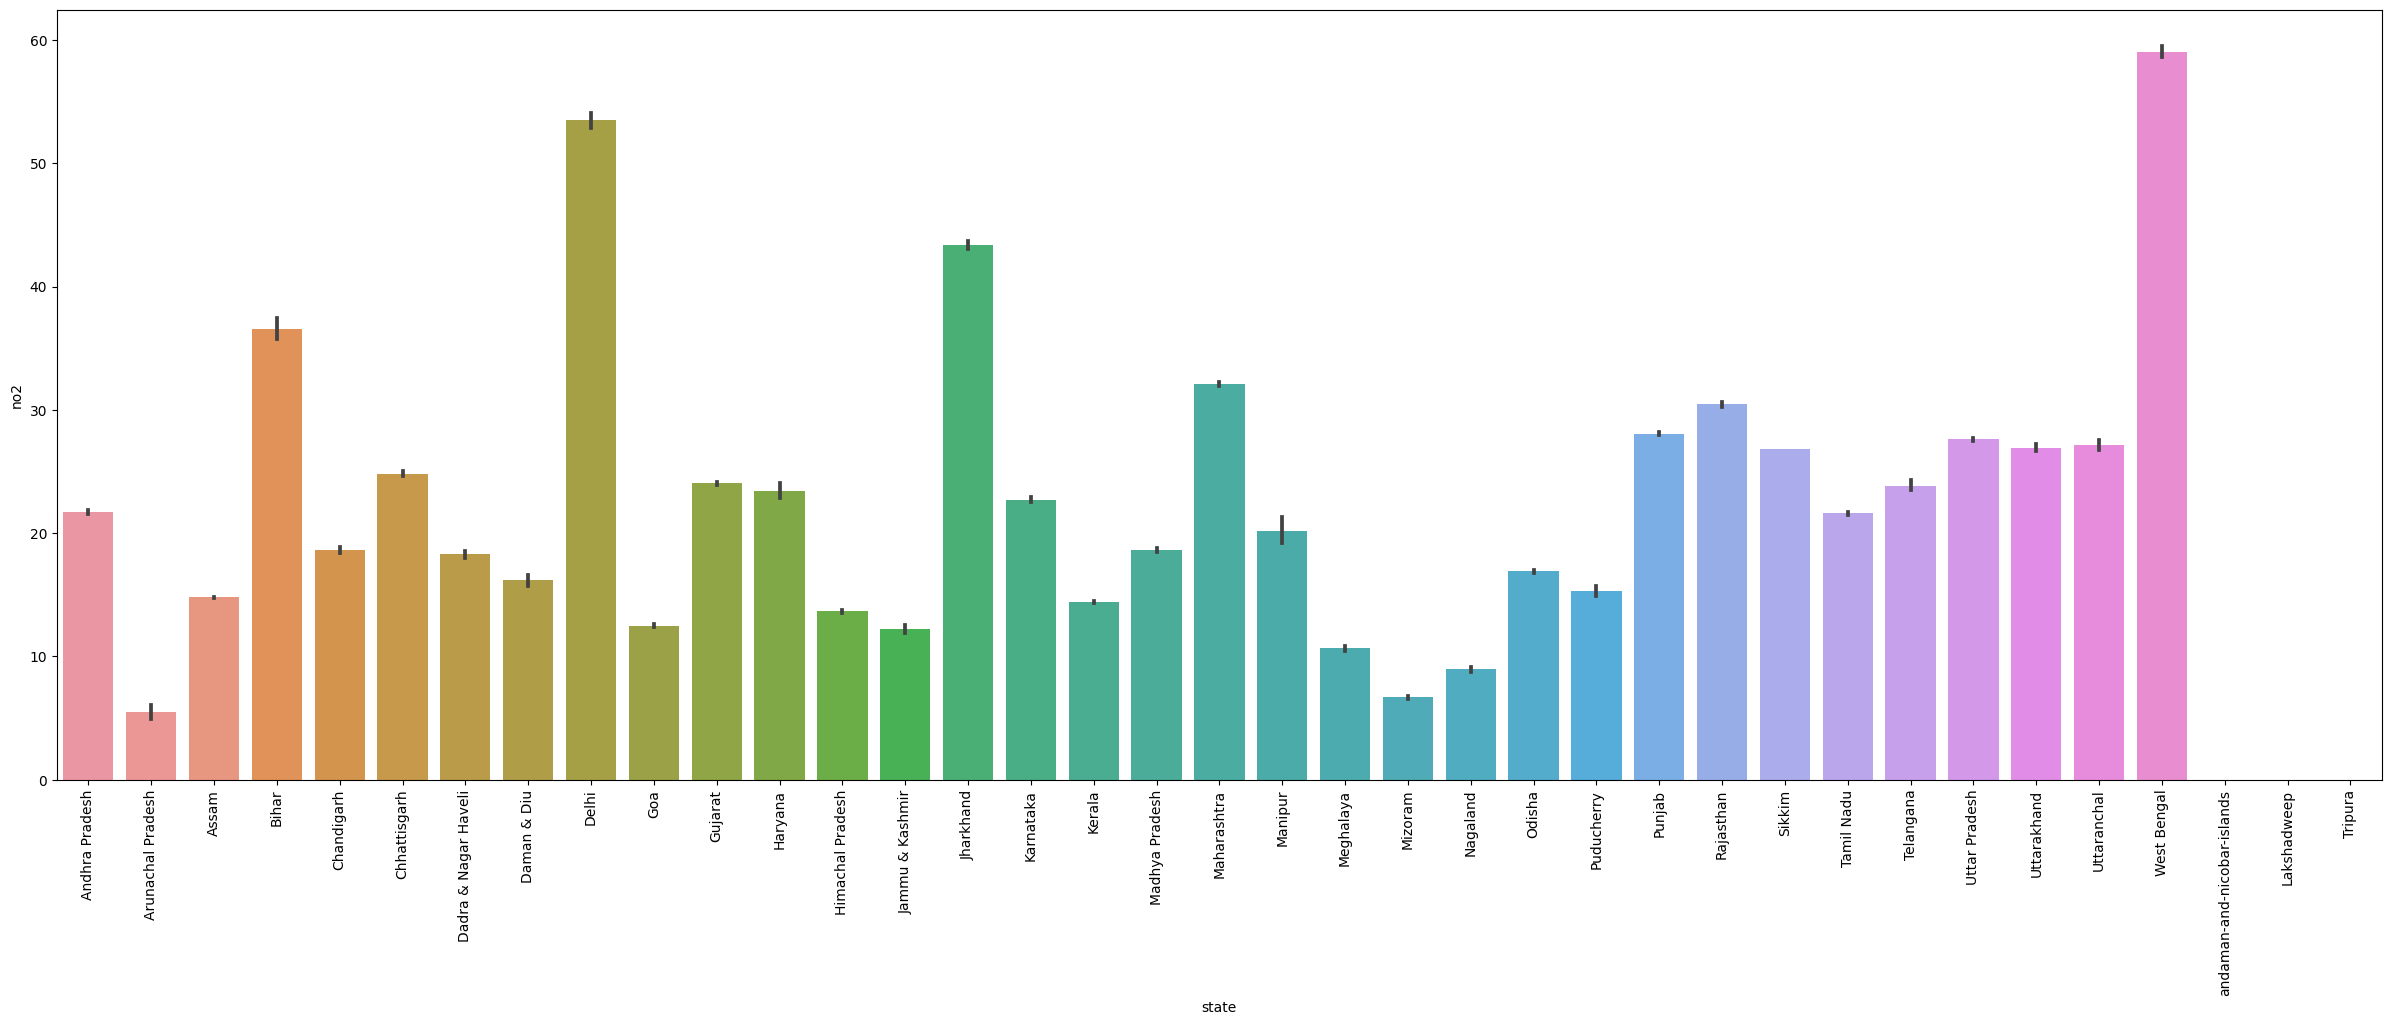

In [15]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df)

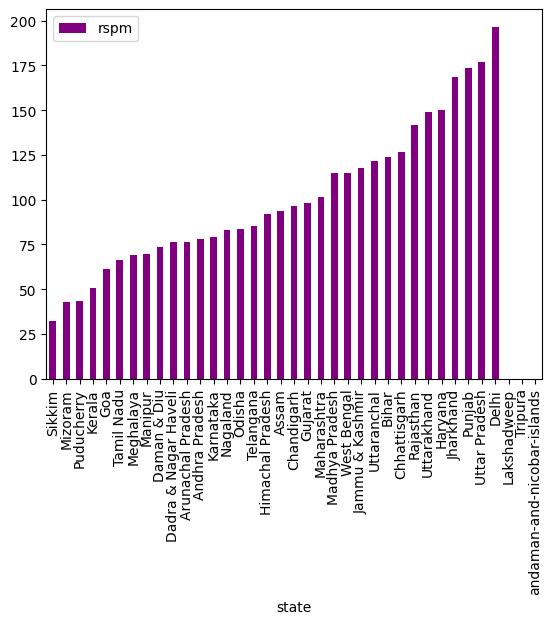

In [16]:
df[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='purple')
plt.show()

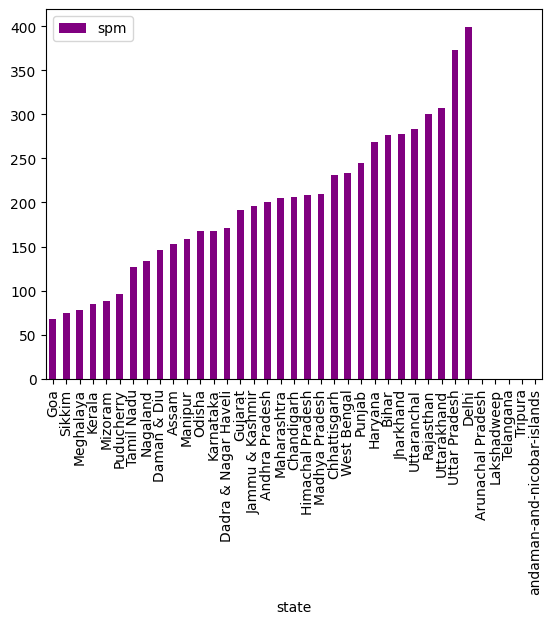

In [17]:
df[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').plot.bar(color='purple')
plt.show()

In [18]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

<h2>Replacing date with year</h2>

In [19]:
df['date'].isna().sum()

7

In [20]:
df['date'].isna().sum()

7

In [22]:

df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df['year'] = df['date'].dt.year

<AxesSubplot:>

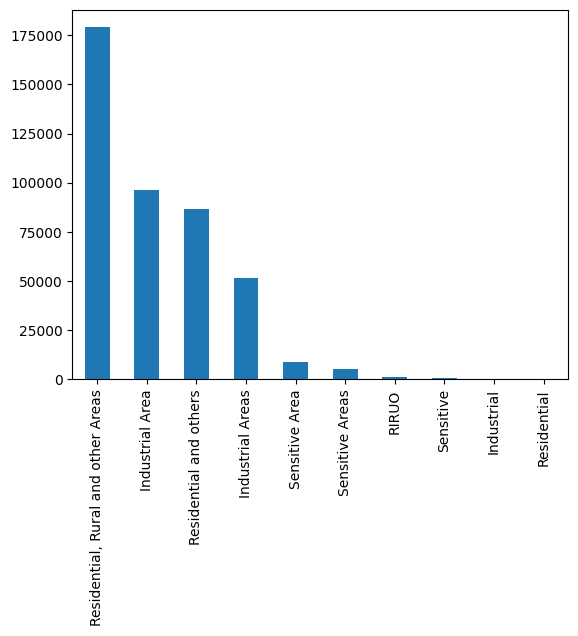

In [23]:
df['type'].value_counts().plot(kind='bar')

In [24]:
df['type'].replace("Sensitive Areas","Sensitive",inplace=True)
df['type'].replace("Sensitive Area","Sensitive",inplace=True)
df['type'].replace("Industrial Areas","Industrial",inplace=True)
df['type'].replace("Industrial Area","Industrial",inplace=True)
df['type'].replace("Residential and others","Residential",inplace=True)
df['type'].replace("RIRUO","Residential",inplace=True)

<AxesSubplot:>

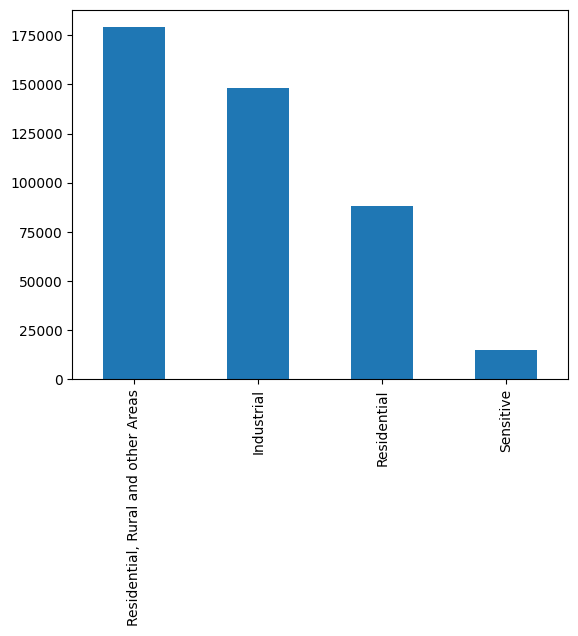

In [25]:
df['type'].value_counts().plot(kind='bar')

<h2>Asking year related questions</2>

In [26]:
Gases = df.pivot_table(values=['so2','no2','rspm','spm'],index='year').fillna(0)

In [27]:
year_so2 = Gases.sort_values(by='so2',ascending=False)
year_so2.head(1)

,no2,rspm,so2,spm
year,,,,
1995.0,33.078066,0.0,26.000877,245.530048


In [28]:
year_so2.tail(1)

,no2,rspm,so2,spm
year,,,,
2003.0,21.499148,88.706643,6.557118,194.662441


In [29]:
year_no2 = Gases.sort_values(by='no2',ascending=False)
year_no2.head(1)

,no2,rspm,so2,spm
year,,,,
1995.0,33.078066,0.0,26.000877,245.530048


In [30]:
year_no2.tail(1)

,no2,rspm,so2,spm
year,,,,
2003.0,21.499148,88.706643,6.557118,194.662441


In [31]:
year_spm = Gases.sort_values(by='spm',ascending=False)
year_spm.head(1)

,no2,rspm,so2,spm
year,,,,
1987.0,30.584545,0.0,21.82707,280.493947


In [32]:
year_spm.tail(1)

,no2,rspm,so2,spm
year,,,,
2015.0,23.58351,100.927573,8.405897,0.0


In [33]:
year_rspm = Gases.sort_values(by='rspm',ascending=False)
year_rspm.head(1)

,no2,rspm,so2,spm
year,,,,
2004.0,28.045844,121.152107,11.534257,183.044357


In [34]:
year_rspm.tail(1)

,no2,rspm,so2,spm
year,,,,
2001.0,28.69995,0.0,15.250711,230.980724


<h1>Treating null values</h1>

In [35]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
year                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [36]:
# Dropping unnecessary columns
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [37]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,year
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990.0
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990.0
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990.0
...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,Residential,22.0,50.0,143.0,NaN,NaN,2015.0
435738,West Bengal,ULUBERIA,Residential,20.0,46.0,171.0,NaN,NaN,2015.0
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
year             7
dtype: int64

In [39]:
#Treating null values of categorical data
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [40]:
#Treating null values of numerical data
df.fillna(0, inplace=True)

In [41]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
year        0
dtype: int64

In [42]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,year
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990.0
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,0.0,0.0,0.0,1990.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990.0
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,0.0,0.0,0.0,1990.0
...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,Residential,22.0,50.0,143.0,0.0,0.0,2015.0
435738,West Bengal,ULUBERIA,Residential,20.0,46.0,171.0,0.0,0.0,2015.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
Gases = df.pivot_table(values=['so2','no2','rspm','spm'],index='state').fillna(0)

In [45]:
Max_so2 = Gases.sort_values(by='so2',ascending=False)
Max_so2.head(1)

,no2,rspm,so2,spm
state,,,,
Jharkhand,42.399899,165.948206,23.02143,124.253671


In [46]:
Max_spm = Gases.sort_values(by='spm',ascending=False)
Max_spm.head(1)

,no2,rspm,so2,spm
state,,,,
Uttaranchal,25.256842,113.154386,22.964561,278.364912


<AxesSubplot:xlabel='state'>

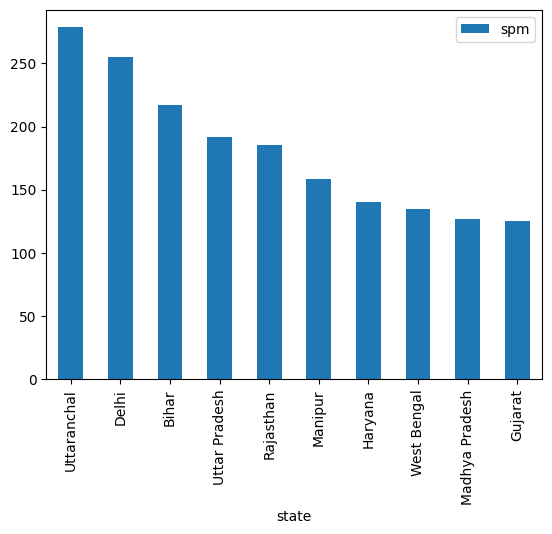

In [47]:
Max_spm.loc[:,['spm']].head(10).plot(kind='bar')

In [48]:
Max_rspm = Gases.sort_values(by='rspm',ascending=False)
Max_rspm.head(1)

,no2,rspm,so2,spm
state,,,,
Jharkhand,42.399899,165.948206,23.02143,124.253671


<AxesSubplot:xlabel='state'>

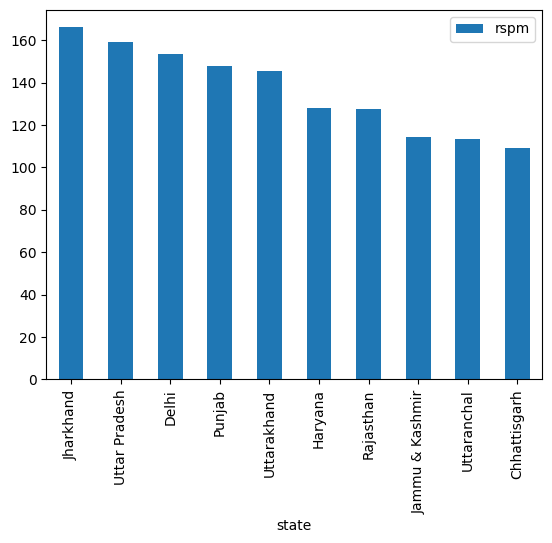

In [49]:
Max_rspm.loc[:,['rspm']].head(10).plot(kind='bar')

<h3>Calculating Air Quality Index for So2</h3>

In [50]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


<h3>Calculating Air Quality Index for No2</h3>

In [51]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


<h3>Calculating rspm individual pollutant index(rpi)</h3>

In [52]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


<h3>Calculating spm individual pollutant index(rpi)</h3>

In [53]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


<h3>Calculating the air quality index (AQI) of every data value</h3>

In [54]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [55]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df

,state,location,type,so2,no2,rspm,spm,pm2_5,year,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,0.0,0.0,0.0,1990.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,0.0,0.0,0.0,1990.0,5.875,9.375,0.0,0.0,9.375,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,Residential,22.0,50.0,143.0,0.0,0.0,2015.0,27.500,62.500,0.0,0.0,62.500,Moderate
435738,West Bengal,ULUBERIA,Residential,20.0,46.0,171.0,0.0,0.0,2015.0,25.000,57.500,0.0,0.0,57.500,Moderate
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,Good
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,Good


In [56]:
df['AQI_Range'].value_counts()

Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: AQI_Range, dtype: int64